In [65]:
# For Kernel Calculations
import math
# For plotting
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# For matrix math
import numpy as np
# Plot style
%matplotlib notebook
# Set plot size in notebook
plt.rcParams["figure.figsize"] = (5, 5)

In [66]:
# Data set
glass = pd.read_csv("../2.Data/Glass_Data.csv")
npdata = glass.values
# Separate input data from labels
npinput = np.append(npdata[:,1:2],npdata[:,4:5],axis=1)
nplabels = np.delete(npdata,np.s_[:9],1)

# Separate training data (clean)
X_train = np.append(npinput[9:176],npinput[185:], axis=0)
Y_train = np.append(nplabels[9:176],nplabels[185:])
# Rest: Test data (polluted)
X_test = np.append(npinput[:9],npinput[176:185], axis=0)
Y_test = np.append(nplabels[:9],nplabels[176:185])

print(X_train.shape)
print(X_test.shape)

(196, 2)
(18, 2)


In [67]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

<IPython.core.display.Javascript object>


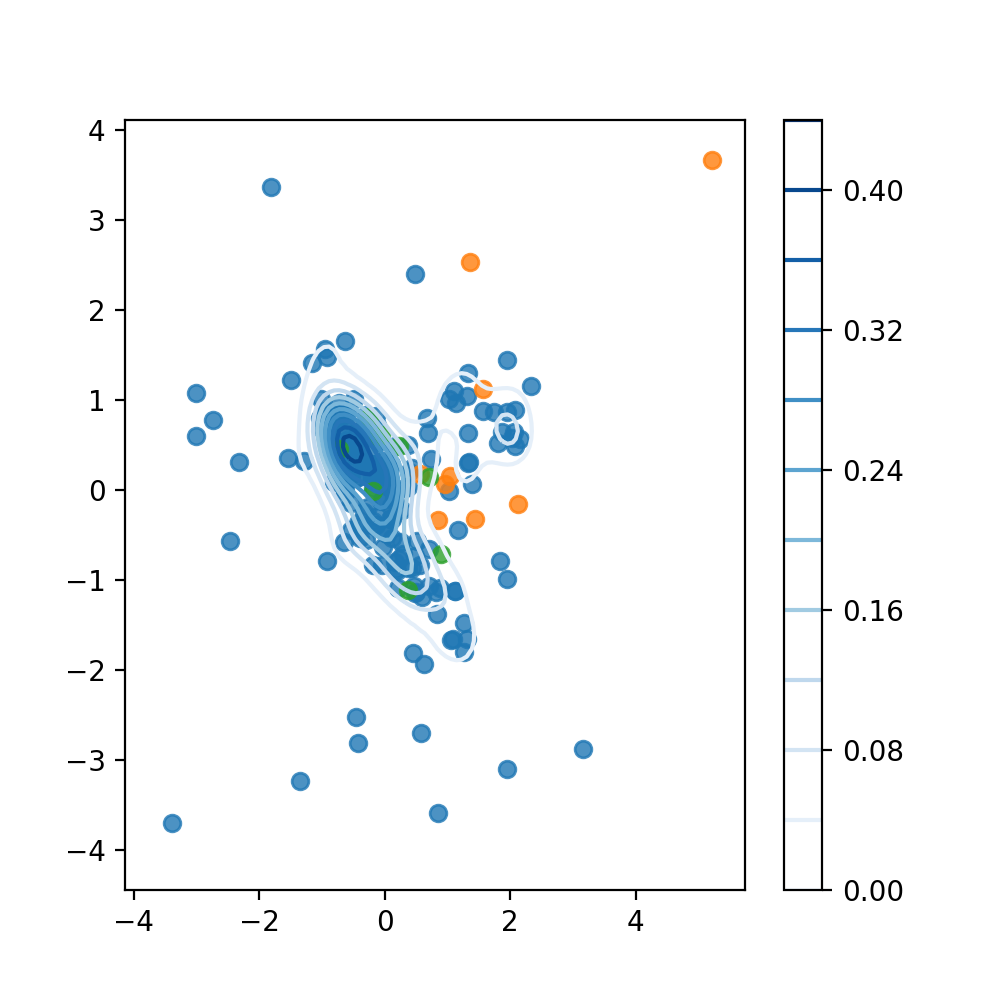

In [68]:
# Visualize Process

# Training Data
sns.regplot(X_train[:,0],X_train[:,1], fit_reg=False)
# Test Data (Novelty)
sns.regplot(X_test[9:,0],X_test[9:,1], fit_reg=False)
# Test Data (Target Samples)
sns.regplot(X_test[:9,0],X_test[:9,1], fit_reg=False)
sns.kdeplot(X_train[:,0],X_train[:,1], cmap='Blues',
            cbar=True, bw=0.25)

plt.show()

In [69]:
# Define Kernel functions
def Kernel(x,y,h,ktype):
    if ktype == 'Gauss':
        c = 1 / math.sqrt(2*math.pi)
        return c * math.exp(-0.5 * (np.linalg.norm(x-y)/h)**2) 

    if ktype == 'Uniform':
        indicator = 0
        if ((np.linalg.norm(x-y))/h < 0.5):
            indicator = 0.5
        return indicator
    
    else:
        print("Please select a valid kernel type: Gauss / Uniform.")
        return None

In [89]:
# Define Functions
def KDE(x,x_i,h,ktype):
    density = 0
    for n in range(x_i.shape[0]):
        density = density + (1/(x_i.shape[0]*(h**x_i.shape[1]))) * Kernel(x,x_i[n],h,ktype)
    return density

In [94]:
# Define hyperparameter
h = 0.35
# Calculate pdf-values for Test Set and apply cutoff:
cutoff = 0.15
kernel = 'Gauss' # 'Gauss'/'Uniform'

for i in range(X_test.shape[0]):
    result = KDE(X_test[i],X_train,h,kernel)
    print("Instanz ", i, ":",result)

Instanz  0 : 0.2544361485643299
Instanz  1 : 0.170102912151327
Instanz  2 : 0.3685714976769387
Instanz  3 : 0.6915412935436304
Instanz  4 : 0.5394803527213847
Instanz  5 : 0.6996028703553688
Instanz  6 : 0.49972543534560154
Instanz  7 : 0.46078286723816414
Instanz  8 : 0.15448737461087167
Instanz  9 : 0.1218002117853651
Instanz  10 : 0.23361636527120835
Instanz  11 : 0.04480047834995767
Instanz  12 : 0.10069013866061868
Instanz  13 : 0.000726939999060868
Instanz  14 : 0.017550560778012394
Instanz  15 : 0.09764727245737599
Instanz  16 : 0.10728687831814344
Instanz  17 : 1.9280271379631542e-28


In [95]:
# Generate confusion matrix:
tp = 0
fn = 0
tn = 0
fp = 0
results = np.empty((X_test.shape[0],1),dtype='object')

for i in range(X_test.shape[0]):
    pdfvalue = KDE(X_test[i],X_train,h,kernel)

    if i < X_test.shape[0]/2 and pdfvalue >= cutoff:
        tp = tp + 1
        results[i] = "True Positive"
    if i < X_test.shape[0]/2 and pdfvalue < cutoff:
        fn = fn + 1
        results[i] = "False Negative"
    if i >= X_test.shape[0]/2 and pdfvalue < cutoff:
        tn = tn + 1
        results[i] = "True Negative"
    if i >= X_test.shape[0]/2 and pdfvalue >= cutoff:
        fp = fp + 1
        results[i] = "False Positive"

print("Confusion Matrix:\n",tp,fp,"\n",fn,tn)

Confusion Matrix:
 9 1 
 0 8


In [92]:
# F1 Score
f1 = (2*tp)/(2*tp+fp+fn)
print(f1)

0.9473684210526315
